<a href="https://colab.research.google.com/github/qqto2008/capstone/blob/master/feature_extraction_of_OCT_CRX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dataset access

## 1.1 Get dataset

IMPORTANT! This dataset is Labelled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification (OCT-CXR) , which is "chest_xray.zip". Please place the "chest_xray.zip" file in the same folder of the .ipynb file.

OR the dataset can be loaded in Google Colab by the following code.

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file   
id='1J739AyasAsMc258PELJY1MwqfDoPSXxG'
downloaded = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
downloaded.GetContentFile('chest_xray.zip')

## 1.2 Unzip the dataset

In [0]:
# unzip the data

import zipfile

myzip = zipfile.ZipFile('chest_xray.zip')
myzip.extractall( )



In [0]:
#myzip.infolist()

#2. Preprocess data

## 2.1 Add labels to images

In [0]:
import matplotlib.pyplot as plt

import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline

In [0]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 512

def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [0]:
train = get_training_data('./chest_xray/train')
test = get_training_data('./chest_xray/test')
val = get_training_data('./chest_xray/val')
print(len(train))
print(len(test))

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

5216
624


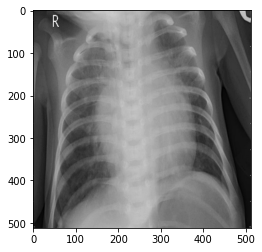

In [0]:
plt.imshow(train[10][0], cmap='gray')

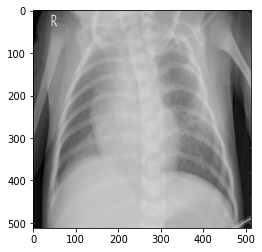

In [0]:
plt.imshow(train[2][0], cmap='gray')

##2.2 Resize the Dataset

In [0]:
train_X = []
train_y = [] 
test_X = []
test_y = []

for feature, label in train_images:
    train_X.append(feature)
    train_y.append(label)

for feature, label in test_images:
    test_X.append(feature)
    test_y.append(label)
    
for feature, label in val_images:
    train_X.append(feature)
    train_y.append(label)
   
# resize data for modeling 
train_X = np.array(train_X).reshape(-1, img_size, img_size, 1)
train_y = np.array(train_y)
test_X = np.array(test_X).reshape(-1, img_size, img_size, 1)
test_y = np.array(test_y)


In [0]:
train_X = train_X / 255
test_X = test_X / 255
print(len(train_X))


5232


In [0]:
plt.imshow(train_X, cmap='gray')

# 3.Feature Extraction

## 3.1 Image segmentation(OSTU)

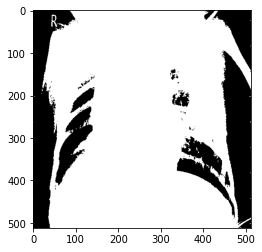

In [0]:
import cv2
import numpy as np

import matplotlib.pylab as plt

train_images = []
for i in range(len(train)):
  for j in range(2):

     img = train[i][j]
# global thresholding
     ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
     images = [th1]
     train_images.append(images)
     
train_images = np.array(train_images).reshape(len(train), 2)  

plt.imshow(train_images[2][0], cmap='gray')
#plt.imshow(images[0],'gray')

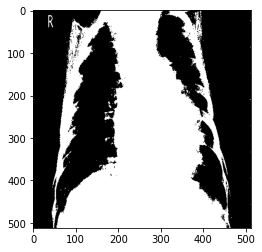

In [0]:
test_images = []
for i in range(len(test)):
  for j in range(2):

     img = test[i][j]
# global thresholding
     ret2,th2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
     images = [th2]
     test_images.append(images)
     
test_images = np.array(test_images).reshape(len(test), 2)  

plt.imshow(test_images[2][0], cmap='gray')

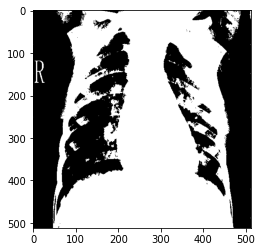

In [0]:
val_images = []
for i in range(len(val)):
  for j in range(2):

     img = val[i][j]
# global thresholding
     ret3,th3 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
     images = [th3]
     val_images.append(images)
     
val_images = np.array(val_images).reshape(len(val), 2)  

plt.imshow(val_images[2][0], cmap='gray')

In [0]:
#get shuffled data
np.random.shuffle(train_images)

np.random.shuffle(test_images)

np.random.shuffle(val_images)

## 3.2 VGG16

This part is still adjusting. Please use 3.1 as feature extraction in current status

In [0]:
import json
import math
import os
from glob import glob 
from tqdm import tqdm
from PIL import Image
import cv2 # image processing
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization


from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.applications import VGG16
from keras.utils.np_utils import to_categorical
from keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,image,img_to_array,load_img

In [0]:
train = get_training_data('./chest_xray/train')
test = get_training_data('./chest_xray/test')
val = get_training_data('./chest_xray/val')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

ValueError: ignored

In [0]:
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(Flatten())
    model.add(Dense(4096, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation="sigmoid"))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['acc']
    )
    return model

vgg16 = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

model = build_model(vgg16 ,lr = 1e-4)
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
_______________________________________________________

In [0]:
# Fit Model
history = model.fit_generator(
    train,
    steps_per_epoch=100,
    epochs=25,
    validation_data=test,
    validation_steps=10
)

ValueError: ignored

In [0]:
base_model2 = vgg16.VGG16(weights='imagenet',
                         include_top=False, ## 是否保留顶层的3个全连接网络
                         input_shape=(height,width,channels),## 输入层的尺寸
                        )
base_model2.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

In [0]:
def extract_features(base_model,sample_count, datagen,feature_shape,labelclass):
    """
    base_model:用来提取特征的深度学习模型，如Xception(weights='imagenet',include_top=False)
    sample_count:需要生成的样本数量
    datagen:使用图片生成器ImageDataGenerator定义的数据集生成器
    feature_shape:每张图片最后转化的特征尺寸，如（5, 5, 2048）
    labelclass:数据集的类别数目
    """
    start = time()
    feature_shape2 = [i for i in feature_shape]
    feature_shape2.insert(0,sample_count)
    features =  np.zeros(shape=tuple(feature_shape2))
    labels = np.zeros(shape=(sample_count,labelclass))
    generator = datagen
    batch_size = generator.batch_size
    i = 0
    for inputs_batch,labels_batch in generator:
        stop = time()
        times = stop - start
        print('\r',
              'Extracting features from batch', str(i+1), '/', len(datagen),
              '-- run time:', times,'seconds',
              end='')
        
        features_batch = base_model.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
            
    print("\n")
    return features,labels

In [0]:
train_features, train_labels = extract_features(base_model2,1097, train_data,(4,4,512),10)
test_features, test_labels = extract_features(base_model2,272, test_data,(4,4,512),10)


Extracting features from batch 35 / 35 -- run time: 235.39105892181396 seconds
Extracting features from batch 9 / 9 -- run time: 61.512227058410645 seconds